# Исследование закономерностей, определяющих успешность игры.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

# Цель исследования:
выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

  # Ход исследования:
  - обзор данных
  - предобработка данных
  - исследовательский анализ 
  - составления портрета пользователя каждого региона
  - проверка двух гипотез
  - общий вывод исследования

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [5]:
data.shape[0]

16715

На этапе обзора данных мы обнаружили пропуски в столбцах: rating, user_score, critic_score, year_of_release, genre, name.
Также нам необходимо привести названия столбцов к змеиному регистру и обнаружено некоторое несоответствие типа данных столбца и содержащейся в нем информации, разберемся с этим на этапе предобработки.

### Предобработка данных

Приведем названия столбцов к должному виду:

In [6]:
data.columns = data.columns.str.lower()

Поработаем с пропусками:

In [7]:
print(data.loc[data['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Нам не нужны игры, о которых нет информации ни по дате выпуска, ни по жанру, поэтому удалим эти 2 строки.

In [8]:
data = data.dropna(subset=['name'])

In [9]:
#проверим
data.shape[0]

16713

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски в столбце year_of_release заменим на значение "3000", чтобы было понятно, что это выброс и при этом мы могли работать с этим стобцом.

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(3000)

Аналогично поступим с пропусками в столбцах 'user_score' и 'critic_score', иначе есть вероятность, что мы не сможем проверить гипотезы, так как будет вылезать Nan.

In [12]:
data.loc[data['user_score'].isna(), 'user_score'] = 3000
data.loc[data['critic_score'].isna(), 'critic_score'] = 3000

In [13]:
data['user_score'].value_counts()

3000    6699
tbd     2424
7.8      324
8        290
8.2      282
        ... 
1.5        2
0.9        2
1.9        2
9.7        1
0          1
Name: user_score, Length: 97, dtype: int64

tbd - to be determined (рейтинг будет определен позднее). Сделаем то же самое и заменим эти значения на выбросы.

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 3000

И сразу приведем столбец к int-овому значению.

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')


В стобце жанра пропуски заменим на "неизвестный" жанр.

In [16]:
data['genre'] = data['genre'].fillna('unknown')

In [17]:
data['critic_score'] = data['critic_score'].astype('float')
data['user_score'] = data['user_score'].astype('float')

In [18]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

In [19]:
#проверим нашу предобработку
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
#посчитаем продажи для всего мира
data['total_cases'] =  data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cases
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,3000.0,3000.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,3000.0,3000.0,unknown,31.38


In [22]:
#посмотрим на явные дупликаты
data.duplicated().sum()

0

# Вывод:
мы выполнили предобрабутку данных, разобрались и заполнили все пропуски, подсчитали продажи по всему миру, явных дупликатов не обнаружено.

### Исследовательский анализ данных

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cases
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,3000.0,3000.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,3000.0,3000.0,unknown,31.38


Посмотритм, сколько игр выпускалось в разные годы

In [24]:
data.groupby(by = 'year_of_release')['year_of_release'].count().sort_index(ascending=True)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
3000     269
Name: year_of_release, dtype: int64

<AxesSubplot:>

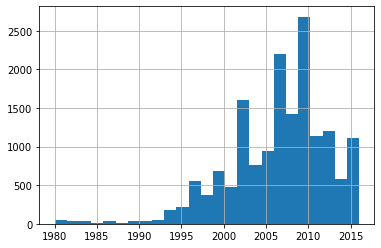

In [25]:
data['year_of_release'].hist(range = (1980, 2016), bins= 25)

Данные по всем периодам не важны.

С 1980 годов по 1993 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC) и технологий языков программирования.

В 2002 году видно, что выпустилось много игр. Это значит в период с 1997 по 2002 появились игровые движки для создания реалистичных игр и новые средства программирования.

Пик в 2009 это не только популярность к созданию компьютерных игр, но и распространенность компьютерных движков, некоторые из которых бесплатны к использованию на сегодняшний день.

Спад индустри игр с 2012 по 2016 обусловлен экономическим кризисом и требованиям к игре. Крупные студии-разработчики как Blizzard создают игры по 10-15 лет.

In [26]:
platform =( 
data.pivot_table(index= 'platform', values='total_cases', aggfunc='sum')
.sort_values(by='total_cases', ascending=False)
)

In [27]:
platform

,total_cases
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


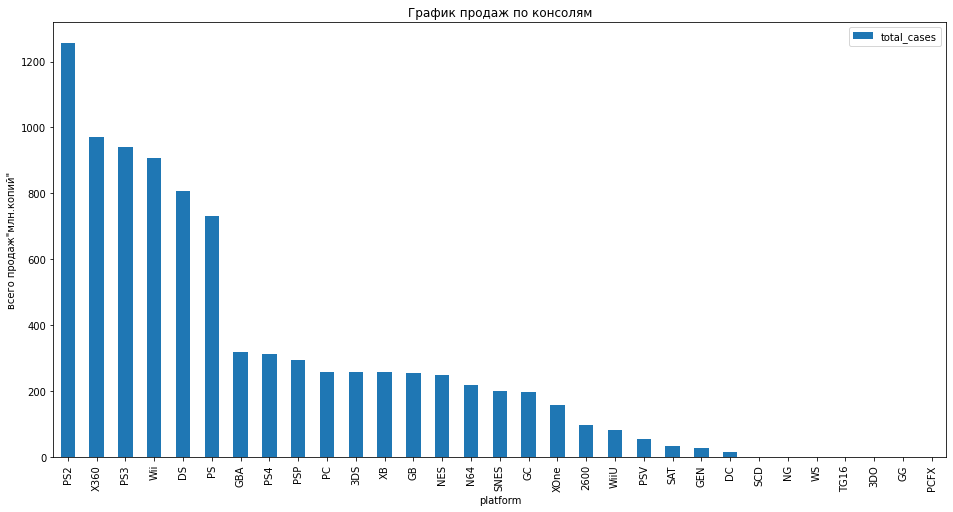

In [28]:
platform.plot(kind='bar',y='total_cases', figsize=(16,8), xlabel='platform', ylabel='всего продаж"млн.копий"', title='График продаж по консолям')
plt.show()

Рассмотрим топ-6 консолей по годам


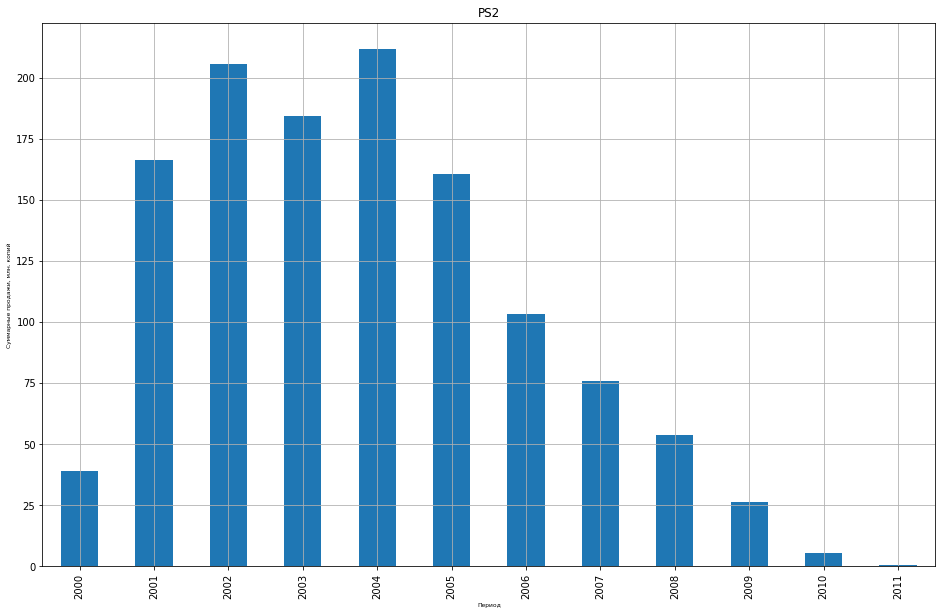

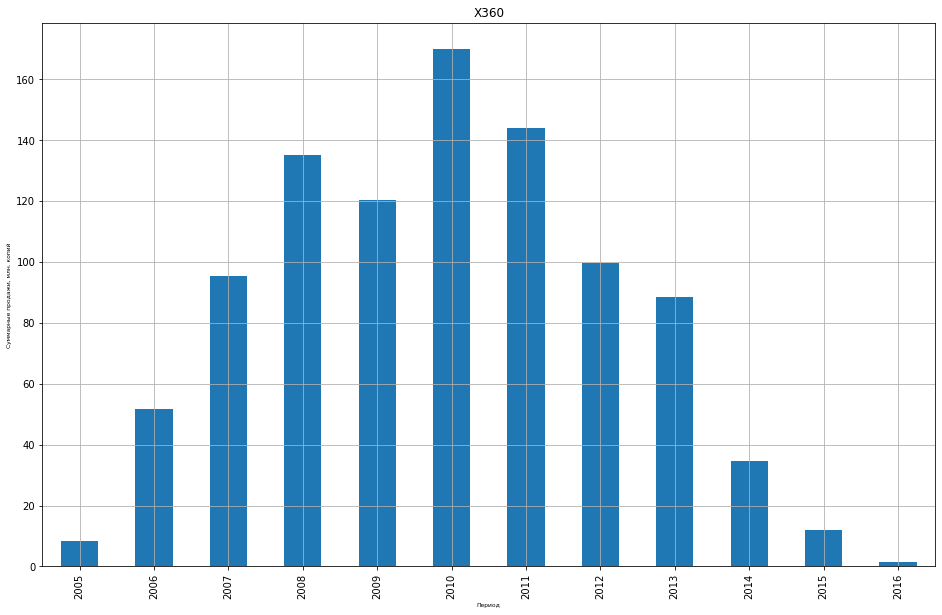

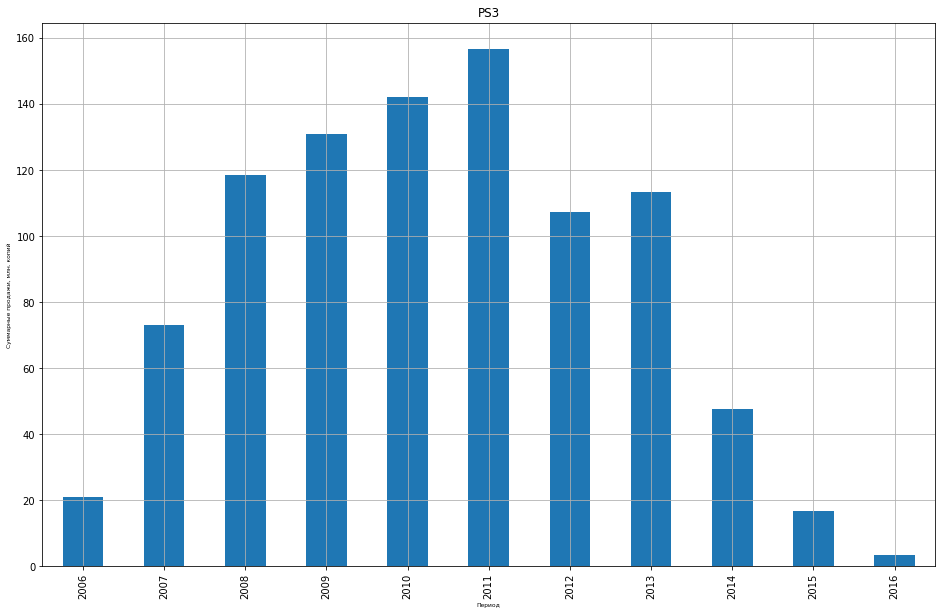

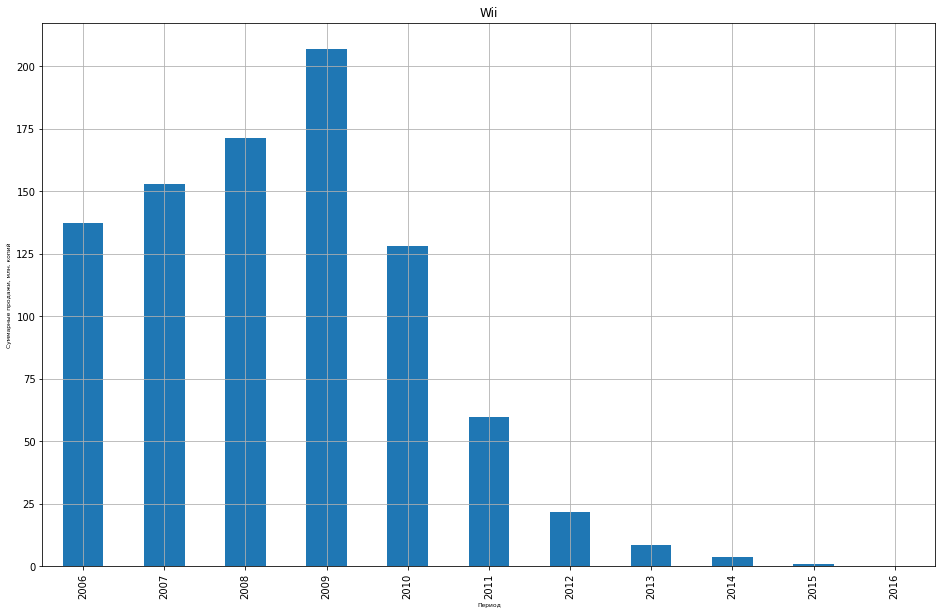

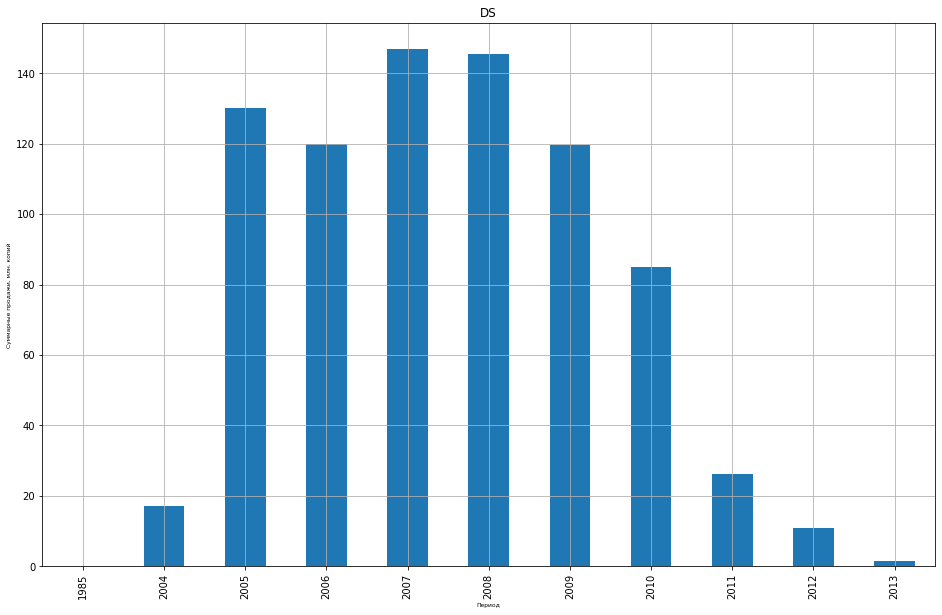

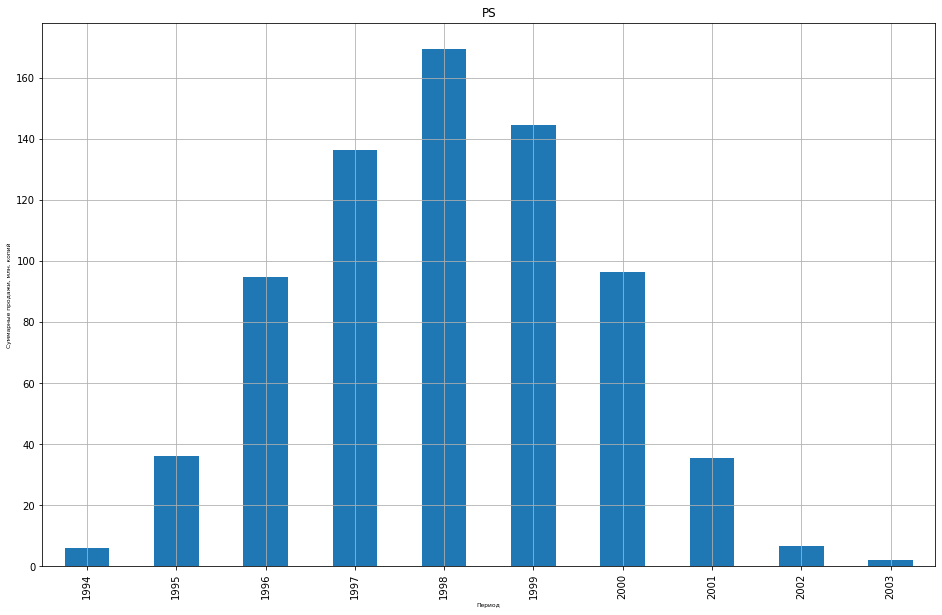

In [29]:
top_platforms_dict = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in top_platforms_dict:
    (
    data.loc[(data['platform'] == platform) & (data['year_of_release'] < 2999)]
    .pivot_table(index='year_of_release', values='total_cases', aggfunc='sum')
    .plot(kind='bar', grid=True, legend=False, figsize=(16, 10))
    )    
    plt.title(platform)
    plt.ylabel('Суммарные продажи, млн. копий', fontsize=6)
    plt.xlabel('Период', fontsize=6)
    plt.show()    

Построив данное распределение по годам, мы однозначно можем сказать, что характерный срок "жизни" платформы составляет 10 лет. Также я заметил странный выброс у платформы DS, и, как оказалось, данная платформа вышла в 2004 году. А пик продаж находится в районе 4 - 6 года существования платформ. Поэтому актуальным периодом выберем диапазон за последние 4 года, т. е. с 2013 года. В дальнейшем будем работать только с этим периодом, поэтому обновим исходный датафрейм.

In [30]:
data = data.loc[data['year_of_release'] >= 2013]

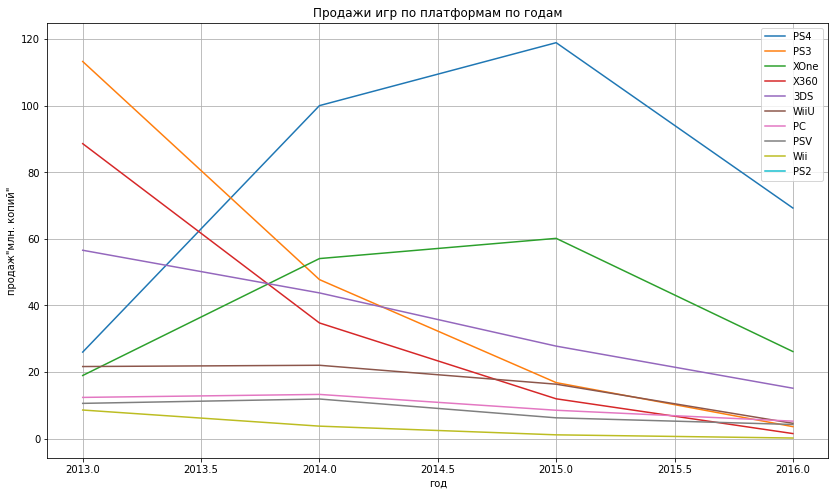

In [31]:
top_new = ['PS4', 'PS3', 'XOne', 'X360', '3DS', 'WiiU', 'PC', 'PSV', 'Wii', 'PS2']
for platform in top_new:
    (
        data.loc[(data['platform'] == platform) & (data['year_of_release'] < 2999)]
        .groupby('year_of_release')['total_cases'].sum()
        .plot(figsize=(14,8), grid=True)
    )
plt.title('Продажи игр по платформам по годам')
plt.xlabel('год')
plt.ylabel('продаж"млн. копий"')
plt.legend(['PS4', 'PS3', 'XOne', 'X360', '3DS', 'WiiU', 'PC', 'PSV', 'Wii', 'PS2'])
plt.show()

Из графика видно, что практически все платформы находятся в стадии снижения продаж, но стоит учитывать, что данные за 2016 год могут быть неполными. Особенно заметно, как падают продажи на платформе PS3 после выхода PS4.

Наиболее прибыльны: PS4, XOne, PC, PS3, X360.

PC, PS4, PSV, XOne, и WiiU - растущие плафтормы.

Наиболее перспективные платформы: PS4, XOne, PC, PS3 и PSV - как растущие и наиболее прибыльные.

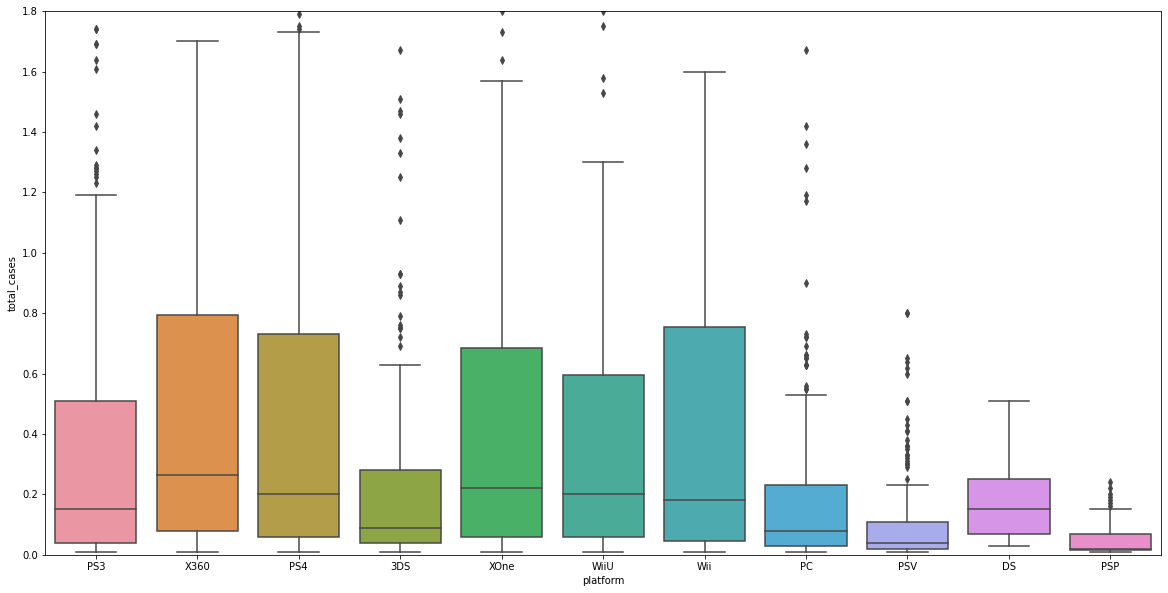

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data.loc[data['year_of_release'] < 2999], x='platform', y='total_cases')
plt.ylim(0, 1.8)
plt.show()


Медианное значение продаж у платформ PS4, PS3 и Wii меньше, чем у XOne и X360 (значения распределены более равномерно), но датасет скошен вправо. На этих платформах осуществляются продажи игр, которые не осуществляются на других, возможно, из-за ценника или жанров игр. Наиболее перспективной и прибыльной выглядит платформа X360: достаточно высокое медианное значение продаж и большой перекос в положительную сторону.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
Рассмотрим влияние отзывов пользователей и критиков на продажи внутри платформы X360.

In [33]:
data=data.reset_index(drop=True)

In [34]:


xbox = data.loc[(data['platform'] == 'X360') & (data['year_of_release'] < 2999)&(data['critic_score']<2999)]

In [35]:
xbox.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cases
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
41,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
59,Battlefield 4,X360,2013,Shooter,2.15,1.01,0.02,0.31,79.0,5.6,M,3.49
65,Assassin's Creed IV: Black Flag,X360,2013,Action,1.90,1.11,0.01,0.29,86.0,7.9,M,3.31


<AxesSubplot:xlabel='critic_score', ylabel='total_cases'>

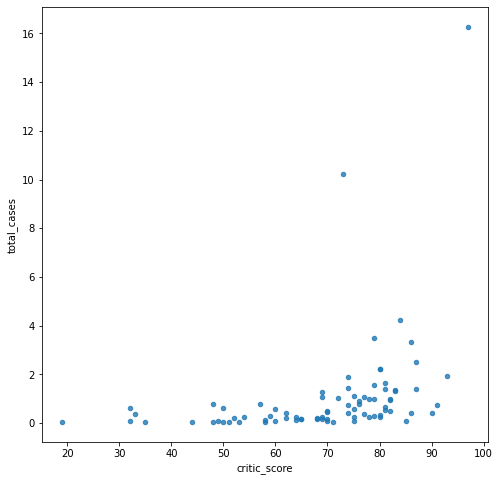

In [36]:
xbox.sort_values('critic_score').plot(x='critic_score', y='total_cases', kind='scatter', figsize=(8,8), alpha=0.8)

In [37]:
xbox['critic_score'].corr(xbox['total_cases'])

0.3503445460228664

Наибольшая плотность у значений оценок 75-85, коэффициент Пирсона говорит нам о незначительной зависимости этих двух переменных.

<AxesSubplot:xlabel='user_score', ylabel='total_cases'>

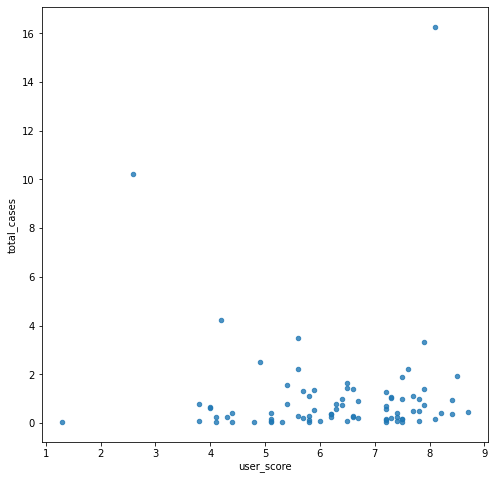

In [38]:

xbox.sort_values('user_score').plot(x='user_score', y='total_cases', kind='scatter', figsize=(8,8), alpha=0.8)


In [39]:
xbox['user_score'].corr(xbox['total_cases'])

-0.006238179532306317

Практически никакой зависимости между оценками пользователей и продажами нет.

In [40]:
all = data.loc[(data['year_of_release'] < 2999) & (data['user_score'] < 2999) & (data['critic_score']<2999)]

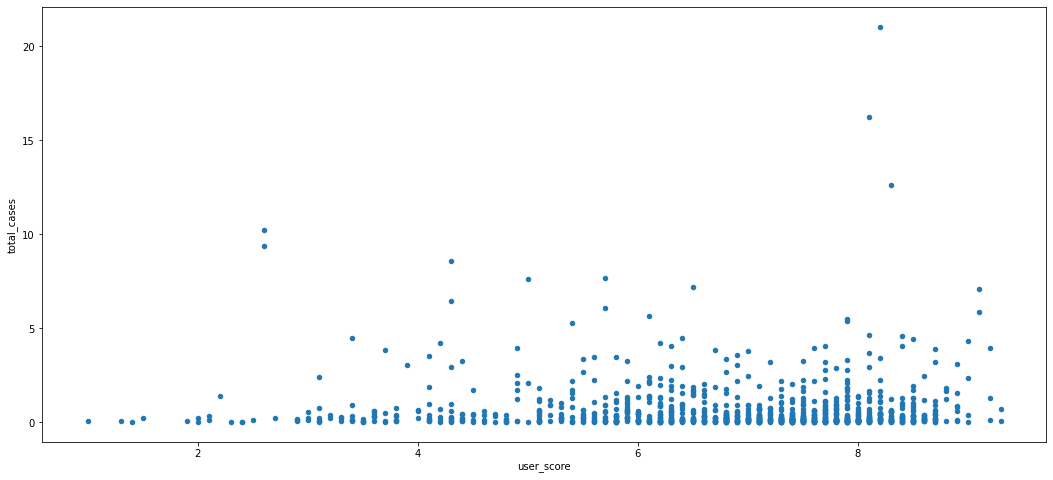

In [41]:


(all.sort_values('user_score')
.plot(x='user_score', y='total_cases', kind='scatter', figsize=(18,8))
)
plt.show()

In [42]:
all['user_score'].corr(all['total_cases'])

-0.004063660293396326

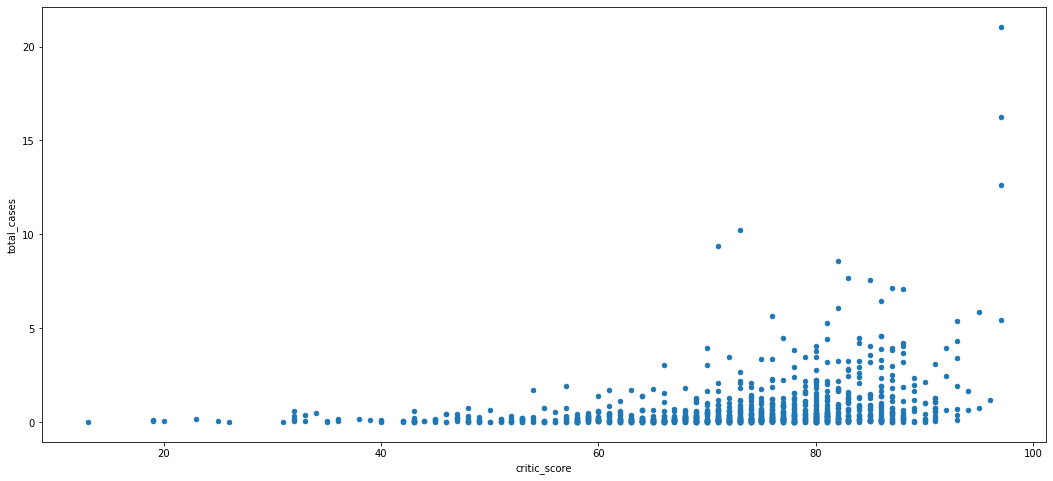

In [43]:
(all.sort_values('critic_score')
.plot(x='critic_score', y='total_cases', kind='scatter', figsize=(18,8))
)
plt.show()

In [44]:
all['critic_score'].corr(all['total_cases'])

0.3116921831260645

Никакой зависимости между глобальными продажами и оценками критиков или пользователей не выявлено.

Посмотрим на общее распределение игр по жанрам.

In [45]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cases
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,3000.0,3000.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,3000.0,3000.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [46]:
genre = (data
.query('year_of_release < 2999')
.pivot_table(index='genre', values='total_cases', aggfunc=['count', 'median','sum'])
)


In [47]:
genre.columns = ['count', 'mean', 'sum']
genre = genre.sort_values(by = 'sum', ascending = False)

In [48]:
genre

,count,mean,sum
genre,,,
Action,766,0.110,321.87
Shooter,187,0.450,232.98
Sports,214,0.240,150.65
Role-Playing,292,0.125,145.89
Misc,155,0.100,62.82
Platform,74,0.225,42.63
Racing,85,0.120,39.89
Fighting,80,0.125,35.31
Adventure,245,0.030,23.64


Можно заметить, что не всегда количество игр жанра гарантирует хорошие продажи. К примеру, в жанре Adventure выпущено игр значительно больше, чем в некоторых других, но они имеют очень маленькое медианное значение продаж.

Кроме того, существуют обратные случаи, когда медианное значение продаж приближается к максимальному, среди всех жанров, но количество игр очень маленькое: жанр Simulation.

# Вывод
Мы вявили, что в среднем каждая плотформа "живёт" 10 лет. Но в качестве актуального периода выбрали диапазон за последние 4 года (т. е. с 2013 года), т. к. пик продаж находится в районе 4 - 6 года существования платформ.
 
По результатам анализа самая прибыльная платформа X360. 
За актуальный период выявили  прибыльные и растущие платформы: PS4, XOne, PC, PS3, X360 и PSV.

Определили, что продажи на платформах не зависят напрямую от рейтинга критиков и пользователей.

Самые прибыльные жанры: Action, Shooter, Sports.

 ### Составление портрета пользоватлея каждого региона:

Определим топ-5 самых популярных платформ для пользователя каждого региона.

In [49]:
country = data.loc[data['year_of_release'] < 2999]
country

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cases
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,3000.0,3000.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,3000.0,3000.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2497,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,3000.0,3000.0,unknown,0.01
2498,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,3000.0,3000.0,unknown,0.01
2499,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,3000.0,3000.0,unknown,0.01
2500,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,3000.0,3000.0,unknown,0.01


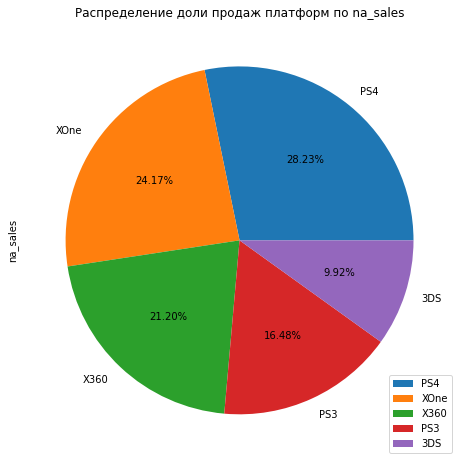

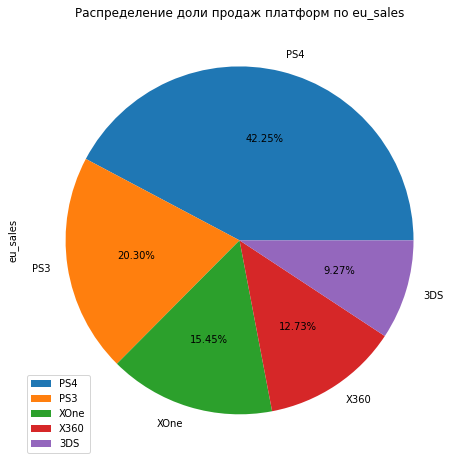

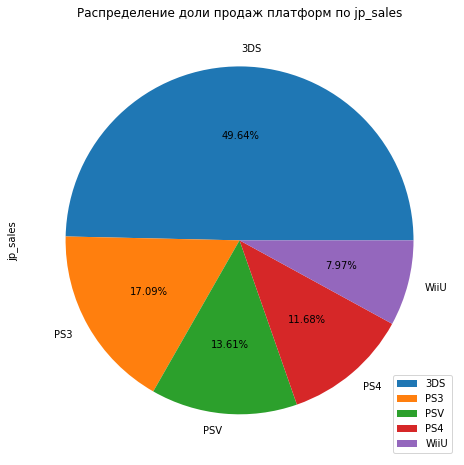

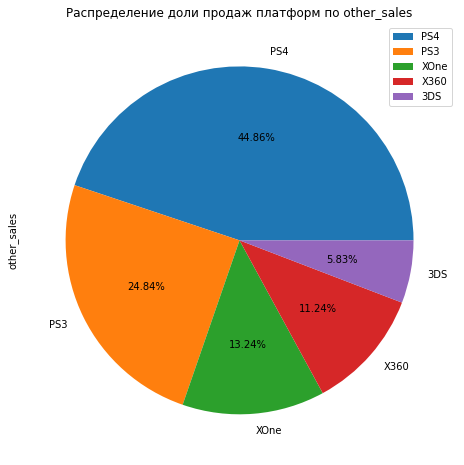

In [50]:
# напишем цикл, который будет выводить топ5 платформ по объему продаж по каждому региону 
# за актуальный период и выводить график с распределением долей продаж
for elem in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    (country.groupby(by='platform')
    .agg({elem :'sum'})
    .sort_values(by=elem, ascending=False)
    .head(5)
    .plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')
    )
    plt.title(f'Распределение доли продаж платформ по {elem}')
    plt.show()


Топ платформ в Северной Америке и в Европе достаоточно схож, но есть отличия. Лидирующие позиции занимает PS4, но в первом случае доля платформы близится к 1/3, а во втором - доля близка к половине.
Особое внимание надо обратить на азиатский рынок: 
3DS - практически половина от всех платформ, а PS3 обгоняет PS4, этот рынок координально отличается от американского и европейского.

Теперь посмотрим на жанры:

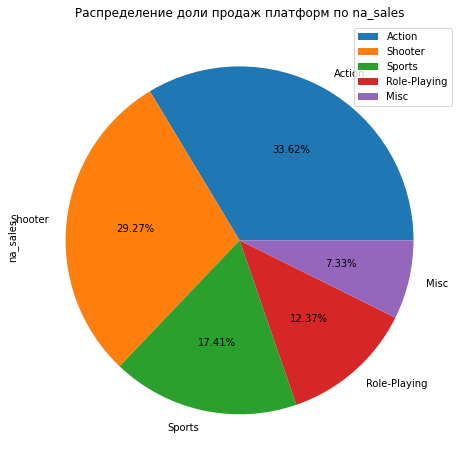

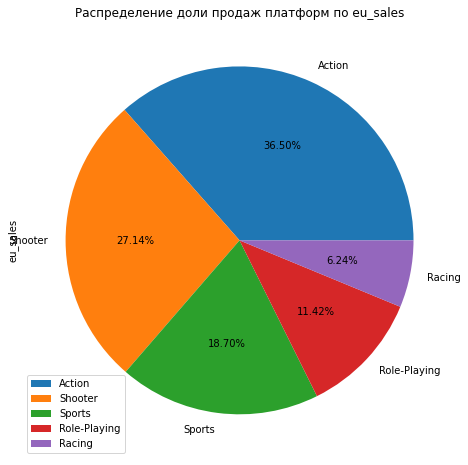

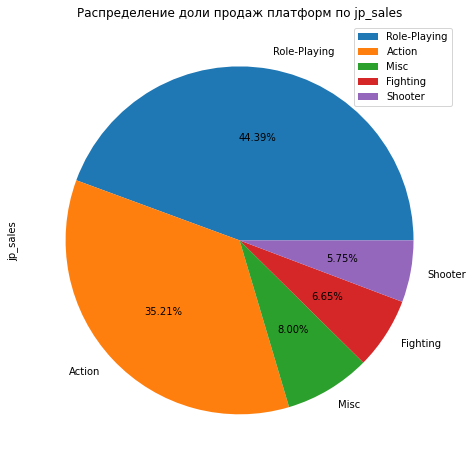

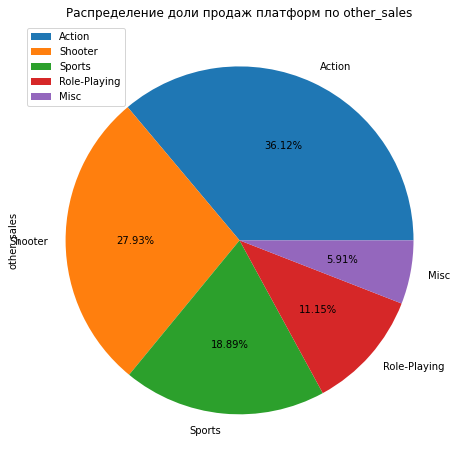

In [51]:
for elem in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    (country.groupby(by='genre')
    .agg({elem :'sum'})
    .sort_values(by=elem, ascending=False)
    .head(5)
    .plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.2f%%')
    )
    plt.title(f'Распределение доли продаж платформ по {elem}')
    plt.show()

Топ5 жанров в США и Европе практически словпадает 1 мето (33-36.5% всех продаж) и 2 место (27-30% всех продаж) у жанров Action и Shooter соответственно. Role-Playing и Sports с примерно равным соотношением долей продаж (11-13%), в зависимости от региона жанры занимают 3 или 4 место. На 5 месте жанр в Европе - Racing(6.2%), а в Америке - Misc(7.3%).
Топ5 жанров в Японии заметно отличается. Тут 1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 35% продаж. Жанры Misc, Flighting и Shooter по 8, 6 и 5 процентов соответственно. При выходе на Японский рынок стоит учитывать его особенности.

Влияние рейтинга ESRB на продажи в регионах

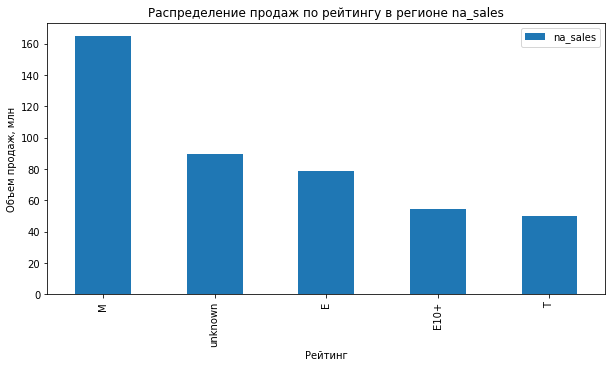

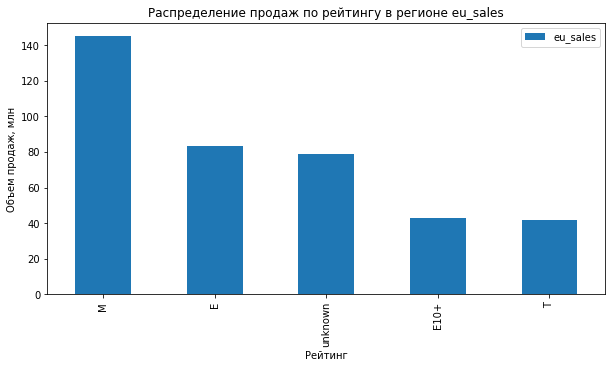

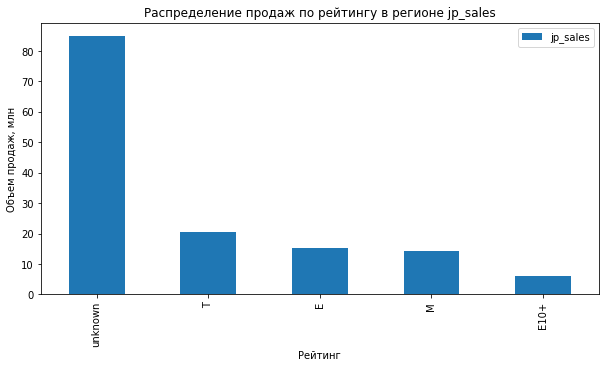

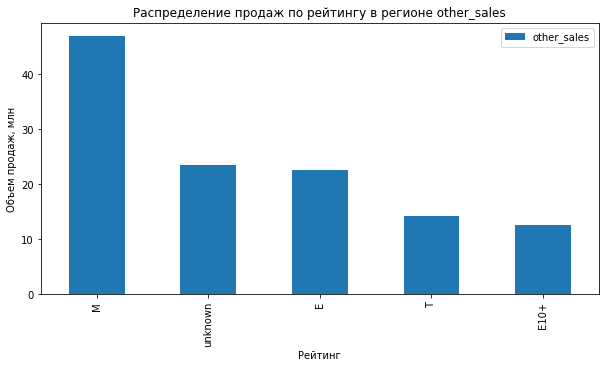

In [52]:
# напишем цикл, который будет выводить распределение продаж по рейтингам 
# по каждому региону за актуальный период
for elem in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    (country.groupby(by='rating')
    .agg({elem :'sum'})
    .sort_values(by=elem, ascending=False)
    .plot(kind='bar', figsize=(10,5), grid=False)
    )
    plt.title(f'Распределение продаж по рейтингу в регионе {elem}')
    plt.xlabel('Рейтинг')
    plt.ylabel('Объем продаж, млн')
    plt.show()

AO (Adults only 18+) — только для взрослых
E - everyone - для всех
M (Mature 17+) — от 17 лет
T (Teen) — для подростков 13-19 лет
K-A (Kids to Adults)— для детей и взрослых
E10+ (Everyone 10+) — для всех старше 10 лет
EC (Early Childhood) — для детей младшего возраста
RP (Rating pending) — рейтинг ожидается

Несмотря на большое количество пропусков, мы можем увидеть что в Америке и Европе по объемам продаж лидирует группа от 17 лет, далее идет группа "для всех", наименьшее количество продаж у игр для подростков.
В Японии опять ситуация кординально другая: игры для подростков лидируют, а игры от 17 лет находятся лишь на 4-ом месте.

# Вывод:
В Северной Америке и Европе очень схожий портрет пользователя:

Топ5 платформы PS4, XOne, X360, PS3 и 3DS с небольшой разницей в распределении продаж.
самые популярные жанры - Action, Shooter, Sports и Role-Playing.
бОльшая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех. Затем идут в примерно равных долях E10+ (Everyone 10+) — для всех старше 10 лет и T (Teen) — для подростков 13-19 лет

Портрет пользователя в Японии заметно отличается:

лидирует местная платформа: половина продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 13.6%, 11.6% и 7.9% соответственно, когда PS3 занимает долю в 17%.
 Тут 1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 35% продаж. Жанры Misc, Flighting и Shooter по 8, 6 и 5 процентов соответственно. При выходе на Японский рынок стоит учитывать его особенности.
в примерно равной популярности рейтинги E - everyone - для всех и T (Teen) — для подростков 13-19 лет. На 3 месте M (Mature 17+) — от 17 лет. При выходе на Японский рынок стоит учитывать его особенности.

# Проверим гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [53]:
ratings_pc = data[(data['user_score']!=3000)&(data['platform']=='PC')&
                  (data['year_of_release']<3000)]
ratings_xone = data[(data['user_score']!=3000)&(data['platform']=='XOne')&
                  (data['year_of_release']<3000)]

In [54]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(ratings_pc['user_score'], ratings_xone['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вывод:
Для уровня значимости альфа = 0.05
нет оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ PC и Xbox One одинаковые.

Средние пользовательские рейтинги жанров Action и Sports  разные.

In [55]:
ratings_action = data[(data['user_score']!=3000)&(data['genre']=='Action')&
                (data['year_of_release']<3000)]
ratings_sports = data[(data['user_score']!=3000)&(data['genre']=='Sports')&
                (data['year_of_release']<3000)]

In [56]:
alpha = 0.05
results = st.ttest_ind(ratings_action['user_score'], ratings_sports['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Вывод:
Отвергаем нулевую гипотезу H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые в пользу альтеративы.

### Выводы:
Было проведено исследование исторических данных продаж игр для разных платформ с 2013 по 2016 годы.

По результатам исследования получены данные о том, что среднее время актуального присутствия платформы на рынке составляет примерно 11 лет.
Наиболее популярные по продажам за всё время платформы: ps2, x360, ps3, wii, ds, ps.
Продажи игр достигли своего пика в 2008 году и с того времени неуклонно падают.
В 2016 году актуальными остаются платформы pc, psv, 3ds, wiiu, xone, ps4.
Продажи по ним будут ниже, чем в 2016 году.
Наиболее популярные жанры - platform,shooter,sports
Для некоторых платформ характерно слабое влияние на продажи рейтинга игр от критиков.
Влияние рейтинга от пользователей на продажи игр практически отсутствует.
Регионы Северная Америка и Европа похожи по своим предпочтениям по жанрам игр, Япония от них существенно отличается.
В целом, считаю снижение продаж игр закономерным, вследствие переноса интереса пользователей в сторону: * Игр на мобильных платформах (Android, IOS). * Бесплатных онлайн-игр с донатами.